In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/COCO2014ValDemographicAnnotations/images_val2014.csv')

In [3]:
df.sample(10)

,id,skin,ratio,bb_skin,bb_gender,split
5824,246863,['Light'],[0.08643310265282583],Light,Unsure,train
7504,316648,"['Light', 'Light', nan, 'Light']","[0.08282352941176471, 0.02326470588235294, 0.0...",Light,Male,train
15670,554266,"['Light', 'Light']","[0.15936232, 0.084994128]",Light,Unsure,val
13334,562557,"['Light', 'Light', 'Light', 'Light']","[0.02080078125, 0.053515625, 0.026988932291666...",Light,Both,train
5812,246535,['Light'],[0.13622822822822822],Light,Male,train
5014,210374,"['Light', 'Light']","[0.2504482938718663, 0.29761490250696376]",Light,NaN,train
184,7325,[nan],[0.0775110446985447],NaN,Male,train
6975,295491,"['Light', 'Dark', 'Light']","[0.1216796875, 0.0816328125, 0.0219296875]",Both,Male,train
11401,482172,[nan],[0.04991583723653396],NaN,Male,train
3000,127451,"['Light', 'Light']","[0.12497804449648713, 0.10273346018735363]",Light,Male,train


In [4]:
df.describe()

,id
count,15762.000000
mean,291073.385103
std,167921.637049
min,136.000000
25%,147033.250000
50%,292421.500000
75%,437198.750000
max,581886.000000


In [5]:
df_f = df[df['split'] == 'train']

In [6]:
df_f.sample(20)

,id,skin,ratio,bb_skin,bb_gender,split
1262,52627,['Unsure'],[0.2381989168618267],Unsure,Unsure,train
9917,419369,['Light'],[0.19112265807962528],Light,Male,train
9269,391688,"[nan, 'Light']","[0.03748101265822785, 0.06410126582278482]",Light,Male,train
4957,208406,"['Light', 'Light', 'Light']","[0.051663663663663664, 0.16406606606606608, 0....",Light,Male,train
12430,525297,['Light'],[0.31392920616113745],Light,Unsure,train
7981,336602,['Unsure'],[0.08623968160377359],Unsure,Unsure,train
3977,168801,"[nan, 'Light']","[0.09592725409836066, 0.20809060304449647]",Light,Male,train
6422,273059,"['Light', 'Dark', nan]","[0.11444306206088993, 0.03543252341920375, 0.0...",Light,Male,train
3451,146936,"[nan, 'Light']","[0.2575095221606648, 0.24284972299168975]",NaN,Both,train
2066,88895,[nan],[0.23371851851851852],NaN,NaN,train


In [7]:
id = df_f['id'] 
tone = df_f['bb_skin']

In [8]:
#!unzip -q '/content/drive/MyDrive/annotations_trainval2014.zip'

In [10]:
!unzip -q '/content/drive/MyDrive/annotations_trainval2017.zip'

In [11]:
coco = COCO('/content/annotations/captions_train2017.json')

loading annotations into memory...
Done (t=1.23s)
creating index...
index created!


In [12]:
imgIds=sorted(coco.getImgIds())
imgId = imgIds[np.random.randint(100)]

In [13]:
len(imgIds)

118287

In [14]:
type(imgIds)

list

In [15]:
imgIds[1]

25

In [16]:
imgId 

151

In [17]:
img = coco.loadImgs(imgId)

In [18]:
img

[{'license': 1,
  'file_name': '000000000151.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000000151.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-17 08:53:07',
  'flickr_url': 'http://farm3.staticflickr.com/2894/8920100000_ffa8ce09e9_z.jpg',
  'id': 151}]

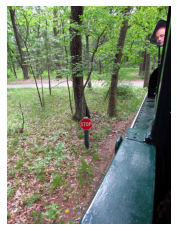

In [19]:
I = io.imread(img[0]['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [20]:
id_list = []

for x in id:
  id_list.append(x)

In [21]:
id_list = id_list[0:10]

In [22]:
len(id_list)

10

In [23]:
# id_list

In [24]:
img_list = []

for x in id_list:
  img = coco.loadImgs(x)
  I = io.imread(img[0]['coco_url'])
  img_list.append(I)

In [25]:
img_list[0]

array([[[ 12,  16,  17],
        [  9,  13,  14],
        [ 12,  16,  17],
        ...,
        [ 24,  23,  21],
        [ 26,  25,  23],
        [ 26,  25,  23]],

       [[ 10,  14,  15],
        [  8,  12,  13],
        [ 12,  16,  17],
        ...,
        [ 31,  30,  25],
        [ 33,  33,  25],
        [ 34,  34,  26]],

       [[  9,  13,  14],
        [  8,  12,  13],
        [ 11,  15,  16],
        ...,
        [ 38,  40,  29],
        [ 39,  41,  30],
        [ 40,  42,  31]],

       ...,

       [[ 35,  54, 148],
        [ 38,  57, 151],
        [ 40,  59, 153],
        ...,
        [215, 197, 183],
        [213, 195, 181],
        [220, 202, 188]],

       [[ 38,  57, 152],
        [ 38,  57, 152],
        [ 37,  56, 151],
        ...,
        [214, 196, 182],
        [211, 193, 179],
        [218, 200, 186]],

       [[ 41,  59, 157],
        [ 41,  60, 155],
        [ 39,  58, 153],
        ...,
        [221, 203, 189],
        [218, 200, 186],
        [224, 206, 192]]

In [26]:
len(img_list)

10

In [27]:
type(img_list)

list

In [28]:
import numpy as np

In [29]:
img_arr = np.array(img_list, dtype='object')

In [30]:
# np.save('img_coco.npy', img_arr, allow_pickle=True) # save
# img_arr_loaded = np.load('img_coco.npy', allow_pickle=True) # load

In [31]:
img_arr.shape 

(10,)

In [32]:
# img_arr_loaded.shape

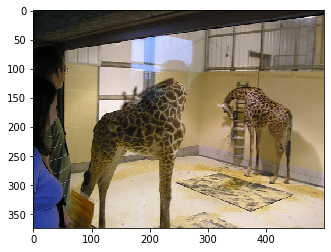

In [33]:
from matplotlib import pyplot as plt
plt.imshow(img_arr[0], interpolation='nearest')
plt.show()

In [34]:
#!cp img_coco.npy /content/drive/MyDrive/

In [35]:
!ls -l --block-size=M

total 1M
drwxr-xr-x 2 root root 1M Nov 23 09:56 annotations
drwx------ 6 root root 1M Nov 23 09:56 drive
drwxr-xr-x 1 root root 1M Nov 22 00:14 sample_data


In [36]:
y_list = []
for x in tone:
  if x=='Dark':
    y_list.append(1)
  if x=='Light':
    y_list.append(0)

In [37]:
#y_arr = np.array(y_list)
y_arr = y_list

In [187]:
# y_arr

In [38]:
y_arr = y_arr[0:10]

In [39]:
# y_arr

In [40]:
# for i in range(len(img_arr)):
#   print(id[i])

In [41]:
dictv = {}

for x,y in zip(id_list, y_list):
  dictv[x] = y

In [42]:
len(dictv)

10

In [43]:
# import cv2

# img_arr_rn = []

# for i in range(len(img_arr)):
#   res = cv2.resize(img_arr[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
#   if res.shape == (224,224,3):
#     img_arr_rn.append(res)

In [44]:
# img_arr_rn = np.array(img_arr_rn)

In [45]:
# img_arr_rn = (img_arr_rn - np.mean(img_arr_rn))/np.std(img_arr_rn)

In [46]:
# img_arr_rn = img_arr_rn/255.0

In [47]:
img_arr_rn = img_arr

In [48]:
type(img_arr_rn[0])

numpy.ndarray

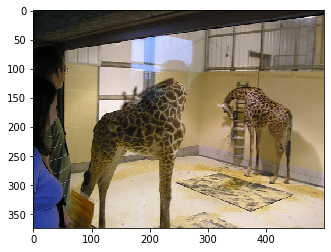

In [49]:
from matplotlib import pyplot as plt
plt.imshow(img_arr_rn[0], interpolation='nearest')
plt.show()

In [50]:
len(img_arr_rn)

10

In [51]:
type(img_arr_rn)

numpy.ndarray

In [52]:
img_arr_rn[0]

array([[[ 12,  16,  17],
        [  9,  13,  14],
        [ 12,  16,  17],
        ...,
        [ 24,  23,  21],
        [ 26,  25,  23],
        [ 26,  25,  23]],

       [[ 10,  14,  15],
        [  8,  12,  13],
        [ 12,  16,  17],
        ...,
        [ 31,  30,  25],
        [ 33,  33,  25],
        [ 34,  34,  26]],

       [[  9,  13,  14],
        [  8,  12,  13],
        [ 11,  15,  16],
        ...,
        [ 38,  40,  29],
        [ 39,  41,  30],
        [ 40,  42,  31]],

       ...,

       [[ 35,  54, 148],
        [ 38,  57, 151],
        [ 40,  59, 153],
        ...,
        [215, 197, 183],
        [213, 195, 181],
        [220, 202, 188]],

       [[ 38,  57, 152],
        [ 38,  57, 152],
        [ 37,  56, 151],
        ...,
        [214, 196, 182],
        [211, 193, 179],
        [218, 200, 186]],

       [[ 41,  59, 157],
        [ 41,  60, 155],
        [ 39,  58, 153],
        ...,
        [221, 203, 189],
        [218, 200, 186],
        [224, 206, 192]]

In [53]:
from torchvision import transforms

tr = transforms.Compose([
        transforms.Resize([224,224]),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [54]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class MyDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.Tensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index],'RGB')
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

data = img_arr_rn
targets = y_arr
#transform = transforms.Compose([transforms.Resize(64), transforms.ToTensor()])
dataset = MyDataset(data, targets, transform=tr)
dataloader = DataLoader(dataset, batch_size=4)

In [55]:
# train_size = int(0.8 * len(full_dataset))
# test_size = len(full_dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [56]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# tensor_x = torch.Tensor(img_arr_rn) # transform to torch tensor
# tensor_y = torch.Tensor(y_arr)
# tensor_x = tensor_x.reshape([10,3,224,224])

In [57]:
# dataset = TensorDataset(tensor_x,tensor_y) # create your datset
# dataloader = DataLoader(dataset) # create your dataloader

In [58]:
# tensor_x.shape

In [59]:
# tensor_x[0].shape

In [60]:
# v = tensor_x[0].numpy().transpose(1,2,0)
# plt.imshow(v)

In [61]:
len(dataset)

10

In [62]:
next(iter(dataset))

(tensor([[[0.0431, 0.0471, 0.0588,  ..., 0.1020, 0.1020, 0.1137],
          [0.0353, 0.0510, 0.0549,  ..., 0.1373, 0.1412, 0.1451],
          [0.0392, 0.0471, 0.0549,  ..., 0.1294, 0.1216, 0.1137],
          ...,
          [0.1451, 0.1490, 0.1529,  ..., 0.8471, 0.8431, 0.8471],
          [0.1451, 0.1490, 0.1451,  ..., 0.8471, 0.8392, 0.8431],
          [0.1569, 0.1490, 0.1529,  ..., 0.8549, 0.8510, 0.8549]],
 
         [[0.0588, 0.0627, 0.0745,  ..., 0.1020, 0.0980, 0.1098],
          [0.0510, 0.0667, 0.0706,  ..., 0.1412, 0.1451, 0.1490],
          [0.0549, 0.0627, 0.0706,  ..., 0.1294, 0.1255, 0.1176],
          ...,
          [0.2196, 0.2235, 0.2275,  ..., 0.7765, 0.7725, 0.7765],
          [0.2196, 0.2235, 0.2196,  ..., 0.7765, 0.7686, 0.7725],
          [0.2275, 0.2235, 0.2275,  ..., 0.7843, 0.7804, 0.7843]],
 
         [[0.0627, 0.0667, 0.0784,  ..., 0.0863, 0.0824, 0.0941],
          [0.0549, 0.0706, 0.0745,  ..., 0.1020, 0.1098, 0.1137],
          [0.0588, 0.0667, 0.0745,  ...,

In [63]:
i,o = next(iter(dataset))
np.max(i.numpy())

1.0

In [64]:
c = i.numpy()
c = (c * 255).astype(np.uint8)
print(c)

[[[ 11  12  15 ...  26  26  29]
  [  9  13  14 ...  35  36  37]
  [ 10  12  14 ...  33  31  29]
  ...
  [ 37  38  39 ... 216 215 216]
  [ 37  38  37 ... 216 214 215]
  [ 40  38  39 ... 218 217 218]]

 [[ 15  16  19 ...  26  25  28]
  [ 13  17  18 ...  36  37  38]
  [ 14  16  18 ...  33  32  30]
  ...
  [ 56  57  58 ... 198 197 198]
  [ 56  57  56 ... 198 196 197]
  [ 58  57  58 ... 200 199 200]]

 [[ 16  17  20 ...  22  21  24]
  [ 14  18  19 ...  26  28  29]
  [ 15  17  19 ...  34  32  29]
  ...
  [148 150 152 ... 184 183 184]
  [150 151 149 ... 184 182 183]
  [154 151 150 ... 186 185 186]]]


In [65]:
# tensor_y.shape

In [66]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [67]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [68]:
dataset_sizes = len(dataset)
print(dataset_sizes)

10


In [69]:
# model = models.resnet50(pretrained=True).to(device)
    
# for param in model.parameters():
#     param.requires_grad = False   
    
# model.fc = nn.Sequential(
#                nn.Linear(2048, 128),
#                nn.ReLU(inplace=True),
#                nn.Linear(128, 2)).to(device)

In [70]:
# phase = 'train'

# def train_model(model, criterion, optimizer, num_epochs=3):
#     for epoch in range(num_epochs):
#         print('Epoch {}/{}'.format(epoch+1, num_epochs))
#         print('-' * 10)

#         for phase in ['train', 'validation']:
#             if phase == 'train':
#                 model.train()
#             else:
#                 model.eval()

#             running_loss = 0.0
#             running_corrects = 0

#             for inputs, labels in dataloader[phase]:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels)

#                 if phase == 'train':
#                     optimizer.zero_grad()
#                     loss.backward()
#                     optimizer.step()

#                 _, preds = torch.max(outputs, 1)
#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)

#             epoch_loss = running_loss / len(image_datasets[phase])
#             epoch_acc = running_corrects.double() / len(image_datasets[phase])

#             print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
#                                                         epoch_loss,
#                                                         epoch_acc))
#     return model

In [71]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        #model.train()
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.type(torch.LongTensor)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # backward + optimize only if in training phase
            
            loss.backward()
            optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            scheduler.step()

        epoch_loss = running_loss / dataset_sizes
        epoch_acc = running_corrects.double() / dataset_sizes

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')    
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [98]:
model_ft_n = models.resnet18(pretrained=True)
num_ftrs = model_ft_n.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft_n.fc = nn.Linear(num_ftrs, 2)

model_ft_n = model_ft_n.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft_n.parameters(), lr=3e-4, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [99]:
# for epoch in range(5):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, data in enumerate(dataloader,0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
#         inputs = inputs.to(device)
#         labels = labels.type(torch.LongTensor)
#         labels = labels.to(device)

#         # zero the parameter gradients
#         optimizer_ft.zero_grad()

#         # forward + backward + optimize
#         outputs = model_ft_n(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer_ft.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 10 == 9:    # print every 2000 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#             running_loss = 0.0

# print('Finished Training')

In [100]:
model_ft_n

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [101]:
model_ft_n = train_model(model_ft_n, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
Train Loss: 0.6290 Acc: 0.8000

Epoch 1/9
----------
Train Loss: 0.4268 Acc: 0.9000

Epoch 2/9
----------
Train Loss: 0.2751 Acc: 0.9000

Epoch 3/9
----------
Train Loss: 0.2527 Acc: 0.9000

Epoch 4/9
----------
Train Loss: 0.2438 Acc: 0.9000

Epoch 5/9
----------
Train Loss: 0.2391 Acc: 0.9000

Epoch 6/9
----------
Train Loss: 0.2382 Acc: 0.9000

Epoch 7/9
----------
Train Loss: 0.2374 Acc: 0.9000

Epoch 8/9
----------
Train Loss: 0.2373 Acc: 0.9000

Epoch 9/9
----------
Train Loss: 0.2372 Acc: 0.9000



In [102]:
class_names = {1:'Dark', 0:'Light'}
classes=['Dark','Light']

torch.Size([3, 224, 224])
(224, 224, 3) torch.Size([3, 224, 224])


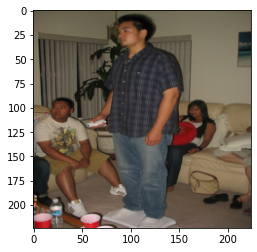

In [103]:
inputs, classes = next(iter(dataloader))
inputs = inputs[2]
inp = inputs
print(inp.shape)
inp = inp.numpy().transpose((1, 2, 0))
print(inp.shape, inputs.shape)
ci = (inp * 255).astype(np.uint8)
plt.imshow(ci)

In [104]:
classes

tensor([0., 0., 1., 0.])

In [105]:
# inp = inp.transpose(1,2,)
# plt.imshow(inp, interpolation='nearest')
# plt.show()

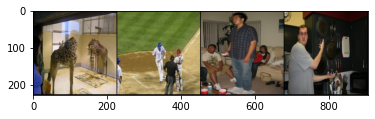

In [106]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = (inp * 255).astype(np.uint8)
    #print(inp.shape)
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # inp = std * inp + mean
    # inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out)

In [115]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            print(labels)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'Predicted: {class_names[preds[j].item()]} | Label:{labels.cpu().data[j]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

tensor([0., 0., 1., 0.])


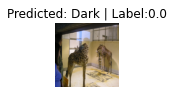

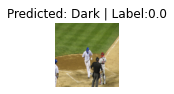

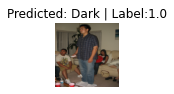

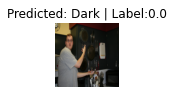

tensor([0., 0., 0., 0.])


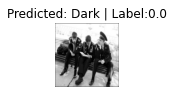

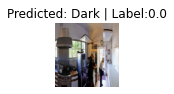

In [116]:
visualize_model(model_ft_n)